## Linear Regression, MLP Regressor, LogisticRegression, KNeighbors and new Features

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn import neighbors
import warnings
warnings.filterwarnings('ignore')

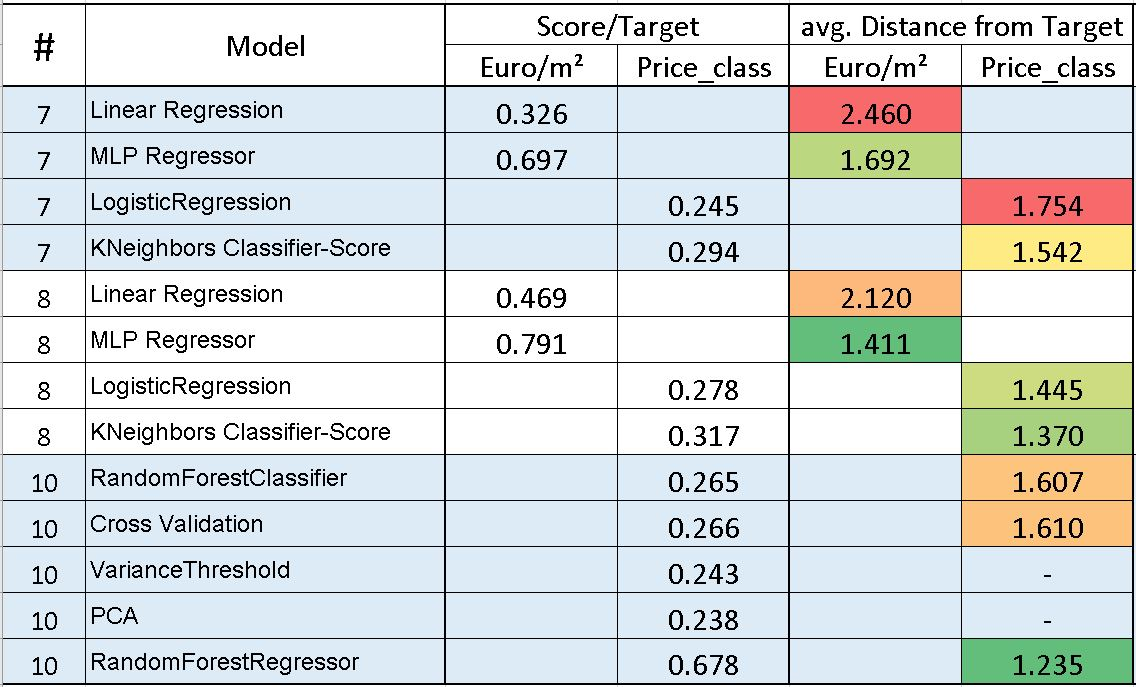

In [2]:
# load data set
immo = pd.read_csv('immo.csv')

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4


In [4]:
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden', 'cellar']
immo[cols] = immo[cols].replace({True:1,False:0})

In [5]:
immo.head(1)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4


### Heatmap

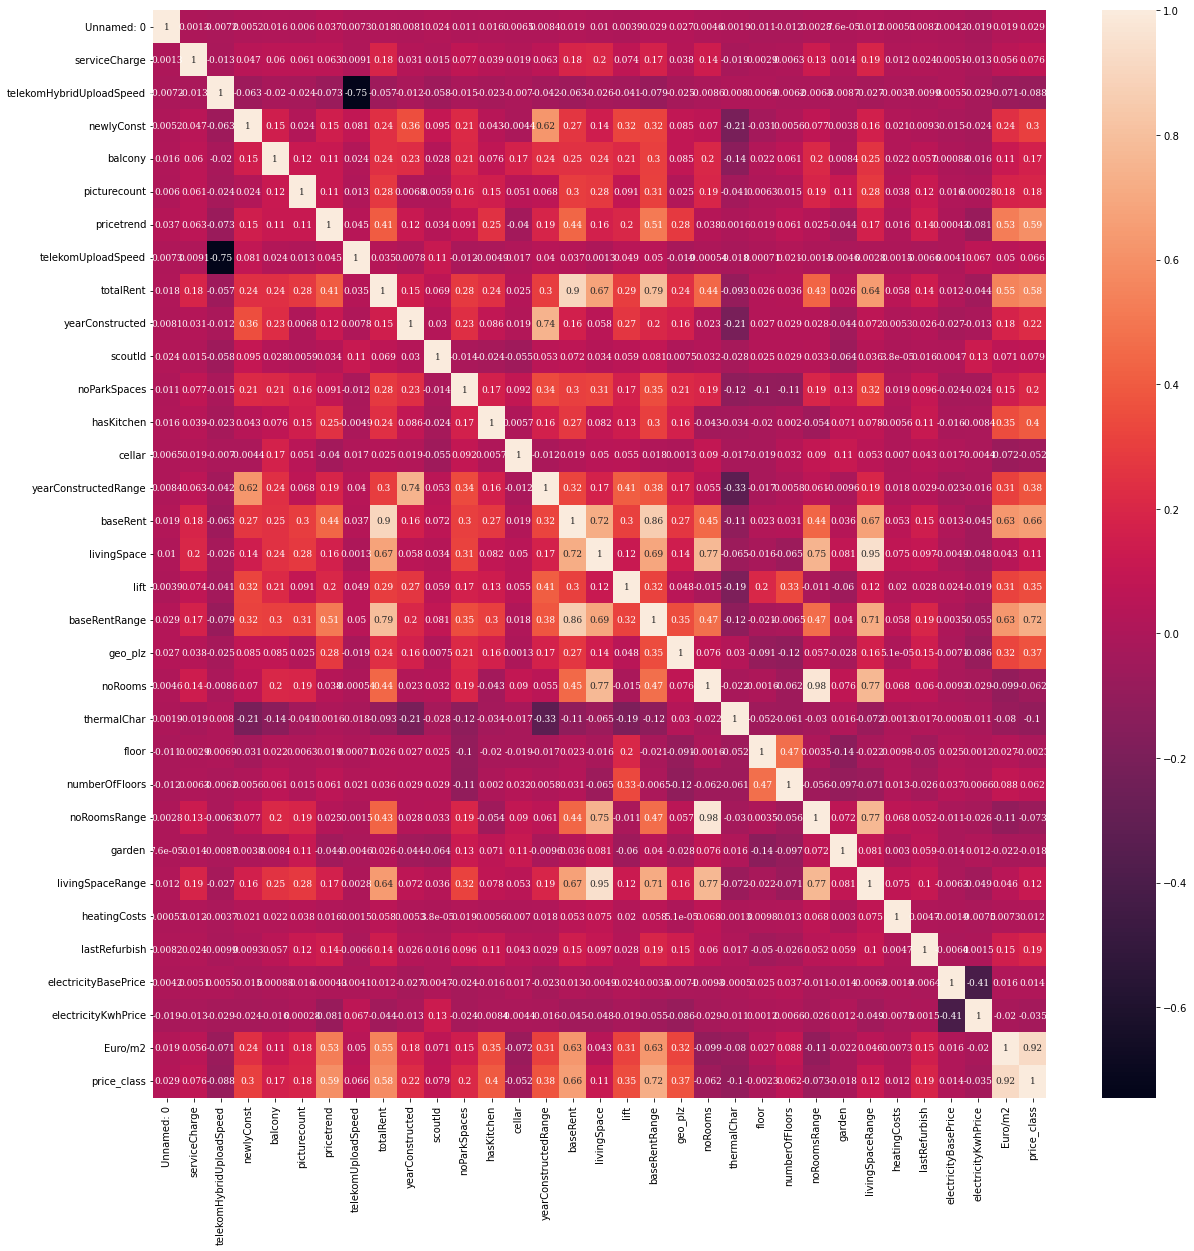

In [6]:
correlations_matrix = immo.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True, annot_kws={
                'fontsize': 9,
                'fontfamily': 'serif'
            })
plt.show()

### Feature selection

In [7]:
x = immo[['serviceCharge', 'newlyConst', 'balcony','cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpaceRange', 'lift', 'noRooms', 'thermalChar', 'geo_plz', 'lastRefurbish']].copy()
x.head(5)

,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpaceRange,lift,noRooms,thermalChar,geo_plz,lastRefurbish
0,245.00,0,0,1,6,1965.0,1.0,0,2.0,4,0,4.0,181.40,44269,2009.1
1,134.00,0,1,0,8,1871.0,2.0,0,1.0,4,0,3.0,114.11,67459,2019.0
2,255.00,1,1,1,8,2019.0,1.0,0,9.0,4,1,3.0,114.11,1097,2009.1
3,58.15,0,1,0,9,1964.0,0.0,0,2.0,2,0,3.0,86.00,9599,2009.1
4,138.00,0,1,0,19,1950.0,0.0,0,1.0,4,0,3.0,188.90,28213,2009.1


### Target selection (Euro/m²)

In [8]:
y = immo[['Euro/m2']].copy()

### train test split

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
print('train_X= ',train_X.shape)
print('test_X= ',test_X.shape)
print('train_Y= ',train_Y.shape)
print('test_Y= ',test_Y.shape)

train_X=  (214248, 15)
test_X=  (53562, 15)
train_Y=  (214248, 1)
test_Y=  (53562, 1)


### Scaling data

In [11]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Linear Regression

In [12]:
linreg=LinearRegression()    # model
linreg.fit(train_X, train_Y)   # model train
y_pred_linreg=linreg.predict(test_X)   # model prediction
print ('train R2: {} -- test R2: {}'.format(linreg.score(train_X, train_Y),
                                            linreg.score(test_X, test_Y)))
# mean squared error
train_mse=mse(linreg.predict(train_X), train_Y)
test_mse=mse(linreg.predict(test_X), test_Y)
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

#mean_absolute_error
train_mae=mae(linreg.predict(train_X), train_Y)
test_mae=mae(linreg.predict(test_X), test_Y)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

def normalize(X):         # normalization function
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

train R2: 0.33200516149037673 -- test R2: 0.3264619684499308
train MSE: 14.369780755917672 -- test MSE: 14.658307774347053
train RMSE: 3.7907493660116427 -- test RMSE: 3.828616953202168
train MAE: 14.369780755917672 -- test MAE: 14.658307774347053


# MLP Regressor (neural network)

In [13]:
# Fitting and training the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50))
mlp.fit(train_X, train_Y)

# Predictions on TEST data and score
mlp_test_predictions = mlp.predict(test_X)
mlp_test_score = r2_score(test_Y,mlp_test_predictions)
print("mlp_test_score is: ", mlp_test_score)

mlp_test_score is:  0.6976789440437138


#### Distance (Linear Regression)
-->calculates the average distance (difference) between target (base rent [Euro]/living space[m]) and prediction (in [Euro/m²])

In [14]:
dist1=pd.concat([test_Y], axis=1)
dist1['predicted'] = y_pred_linreg
dist1['difference'] = round(((dist1['Euro/m2']-dist1['predicted'])**2)**(1/2),2)

In [15]:
dist1

,Euro/m2,predicted,difference
204337,4.92,4.189432,0.73
215731,6.42,10.124799,3.70
168163,11.02,12.998908,1.98
64568,4.58,7.163596,2.58
267465,6.00,5.636399,0.36
...,...,...,...
90274,8.67,8.595474,0.07
1498,6.25,8.182406,1.93
5525,5.20,5.888073,0.69
54995,5.06,7.773853,2.71


In [16]:
dist1['difference'].mean()

2.4598596019566137

#### Distance (MLP)

In [17]:
dist2=pd.concat([test_Y], axis=1)
dist2['predicted'] = mlp_test_predictions
dist2['difference'] = round(((dist2['Euro/m2']-dist2['predicted'])**2)**(1/2),2)

In [18]:
dist2

,Euro/m2,predicted,difference
204337,4.92,5.689543,0.77
215731,6.42,7.340152,0.92
168163,11.02,17.044501,6.02
64568,4.58,6.164982,1.58
267465,6.00,7.034292,1.03
...,...,...,...
90274,8.67,8.311464,0.36
1498,6.25,6.072805,0.18
5525,5.20,6.029424,0.83
54995,5.06,6.306843,1.25


In [19]:
dist2['difference'].mean()

1.6923778051603597

### 







# Multi-class classification (LogisticRegression)

### Target (y) and Feature selection (X)

In [20]:
# Target (y) and Feature selection (X)
y = immo[['price_class']].copy()
X = immo[['serviceCharge', 'newlyConst', 'balcony','cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpaceRange', 'lift', 'noRooms', 'thermalChar', 'geo_plz', 'lastRefurbish']].copy()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head(1)

,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpaceRange,lift,noRooms,thermalChar,geo_plz,lastRefurbish
50850,100.0,0,1,1,14,1895.0,0.0,1,1.0,3,0,2.0,96.9,99086,2009.1


In [22]:
y_train.head(1)

,price_class
50850,5


In [23]:
X_train_num = X_train[['serviceCharge', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpaceRange', 'lift', 'noRooms', 'thermalChar', 'geo_plz', 'lastRefurbish']]
X_train_cat = X_train[['newlyConst','balcony','hasKitchen','lift','cellar']]

### Scaling data

In [24]:
transformer = MinMaxScaler().fit(X_train_num) 
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [25]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,serviceCharge,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpaceRange,lift,noRooms,thermalChar,geo_plz,lastRefurbish
0,0.000684,0.115702,0.876592,0.00,1.0,0.000,0.333333,0.0,0.083333,0.048499,0.990801,0.842029
1,0.000845,0.008264,0.944172,0.00,0.0,0.125,0.166667,0.0,0.083333,0.041535,0.075011,0.842029
2,0.001369,0.115702,0.998041,0.25,0.0,1.000,0.500000,0.0,0.166667,0.057122,0.862657,0.842029
3,0.001027,0.074380,0.998041,0.25,0.0,1.000,0.333333,1.0,0.166667,0.057122,0.654671,0.842029
4,0.001164,0.008264,0.993144,0.00,0.0,0.875,0.166667,0.0,0.083333,0.031515,0.173512,0.842029


In [26]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['newlyConst','balcony','hasKitchen','lift','cellar'],drop_first=True)
X_train_cat.head()

,newlyConst_1,balcony_1,hasKitchen_1,lift_1,cellar_1
50850,0,1,1,0,1
17253,0,1,0,0,1
217025,1,1,0,0,0
151326,1,1,0,1,1
177498,0,0,0,0,0


### encoding data

In [27]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

### Scaling data

In [28]:
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,cellar_1_1
0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0


(214248, 5)

In [29]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)
round(X_train_transformed,2)

,serviceCharge,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpaceRange,lift,noRooms,thermalChar,geo_plz,lastRefurbish,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,cellar_1_1
0,0.0,0.12,0.88,0.00,1.0,0.00,0.33,0.0,0.08,0.05,0.99,0.84,0.0,1.0,1.0,0.0,1.0
1,0.0,0.01,0.94,0.00,0.0,0.12,0.17,0.0,0.08,0.04,0.08,0.84,0.0,1.0,0.0,0.0,1.0
2,0.0,0.12,1.00,0.25,0.0,1.00,0.50,0.0,0.17,0.06,0.86,0.84,1.0,1.0,0.0,0.0,0.0
3,0.0,0.07,1.00,0.25,0.0,1.00,0.33,1.0,0.17,0.06,0.65,0.84,1.0,1.0,0.0,1.0,1.0
4,0.0,0.01,0.99,0.00,0.0,0.88,0.17,0.0,0.08,0.03,0.17,0.84,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214243,0.0,0.07,0.95,0.25,0.0,0.25,0.67,0.0,0.25,0.06,0.86,0.86,0.0,0.0,0.0,0.0,0.0
214244,0.0,0.07,0.85,0.25,1.0,0.00,0.50,0.0,0.17,0.07,0.61,0.84,0.0,0.0,1.0,0.0,0.0
214245,0.0,0.08,1.00,0.25,0.0,1.00,0.50,1.0,0.17,0.03,0.00,0.84,1.0,1.0,0.0,1.0,1.0
214246,0.0,0.02,0.95,0.00,1.0,0.12,0.33,0.0,0.17,0.09,0.22,0.84,0.0,1.0,1.0,0.0,0.0


# Logistic Regression

In [30]:
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='auto', max_iter=100).fit(X_train_transformed, y_train)

In [31]:
X_test_num = X_test[['serviceCharge', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpaceRange', 'lift', 'noRooms', 'thermalChar', 'geo_plz', 'lastRefurbish']]
X_test_cat = X_test[['newlyConst','balcony','hasKitchen','lift','cellar']]
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

### encoding data

In [86]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
display(X_test_cat_encode.head())

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,cellar_1_1
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [33]:
X_test_norm.columns = X_test_num.columns
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
X_test_transformed.head(5)

,serviceCharge,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpaceRange,lift,noRooms,thermalChar,geo_plz,lastRefurbish,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,cellar_1_1
0,0.001054,0.132231,0.852106,0.0,0.0,0.0000,0.500000,0.0,0.250000,0.036625,0.037803,0.666667,0.0,0.0,0.0,0.0,1.0
1,0.000205,0.082645,0.953085,0.0,1.0,0.3875,0.166667,1.0,0.083333,0.057122,0.019910,0.842029,0.0,0.0,1.0,1.0,1.0
2,0.001369,0.165289,0.992165,0.0,1.0,0.8750,0.166667,1.0,0.083333,0.017386,0.205676,0.842029,0.0,1.0,1.0,1.0,1.0
3,0.001232,0.057851,0.886386,0.0,0.0,0.0000,0.500000,1.0,0.166667,0.058069,0.077411,0.842029,0.0,1.0,0.0,1.0,1.0
4,0.001122,0.107438,0.881489,0.0,0.0,0.0000,0.333333,0.0,0.166667,0.063881,0.009652,0.869565,0.0,1.0,0.0,0.0,1.0


### Classification Score

In [34]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.2452111571636608

### KNeighbors Classifier-Score

In [35]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.294219782681752

#### Distance (Logistic Regression)
-->calculates the average distance (difference) between target (price class) and prediction (predicted price class)

In [36]:
dist3=pd.concat([y_test], axis=1)
dist3['predicted'] = predictions
dist3['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)

In [37]:
dist3

,price_class,predicted,difference
204337,2,2,0.0
215731,4,3,1.0
168163,8,8,0.0
64568,2,3,1.0
267465,3,3,0.0
...,...,...,...
90274,6,4,2.0
1498,4,3,1.0
5525,3,3,0.0
54995,3,3,0.0


In [38]:
dist3['difference'].mean()

1.754844852694074

#### Distance (KNeighbors)

In [39]:
dist4=pd.concat([y_test], axis=1)
dist4['predicted'] = predictions_clf
dist4['difference'] = round(((dist4['price_class']-dist4['predicted'])**2)**(1/2),2)

In [40]:
dist4

,price_class,predicted,difference
204337,2,2,0.0
215731,4,5,1.0
168163,8,9,1.0
64568,2,3,1.0
267465,3,5,2.0
...,...,...,...
90274,6,6,0.0
1498,4,4,0.0
5525,3,3,0.0
54995,3,2,1.0


In [41]:
dist4['difference'].mean()

1.5422687726373174

# New Features

### regio1 (Federal State)

Text(0, 0.5, 'baseRent')

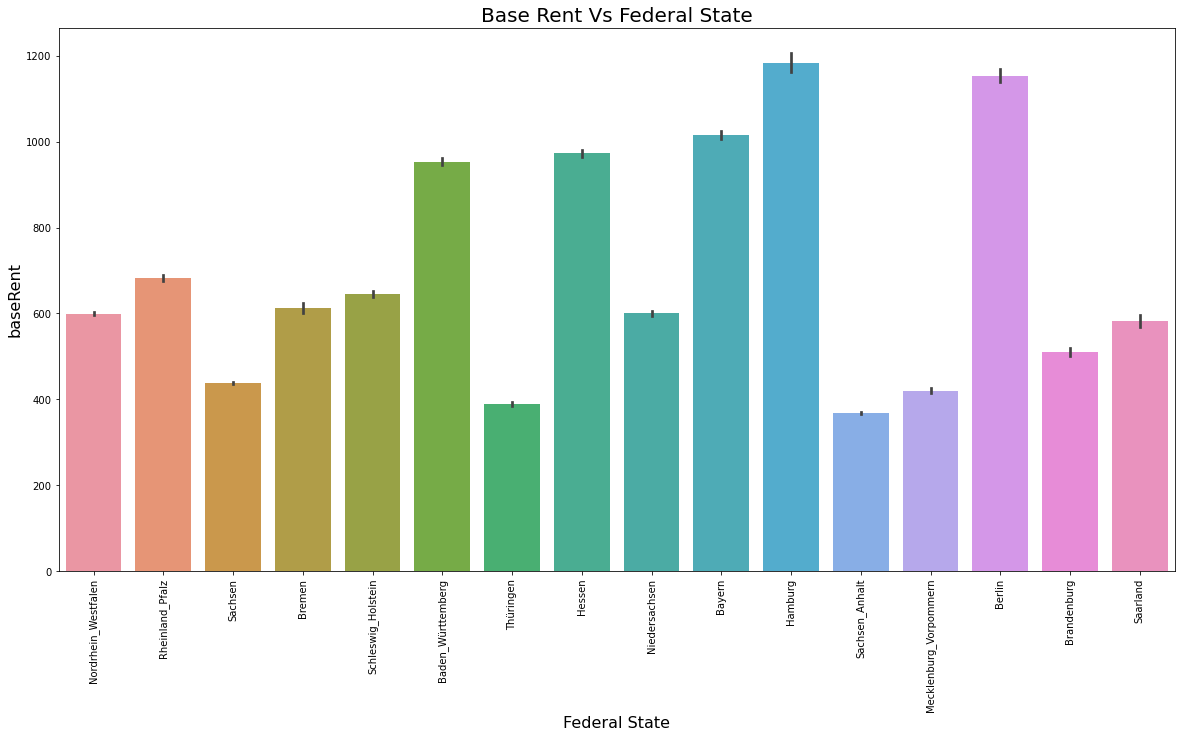

In [42]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'regio1', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Federal State', fontsize = 20)
plt.xlabel('Federal State', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [43]:
state = immo['regio1'].unique()
for x in state:
    print(x,":")
    state_1 = immo.loc[immo['regio1'].str.contains(x, case=False)]
    state_2 = immo.loc[immo['regio1'].str.contains('Hamburg', case=False)]
    mean = round(state_1['baseRent'].mean(),2)
    mean_2 = round(state_2['baseRent'].mean(),2)
    value = round(mean/mean_2,2)
    print(value)

Nordrhein_Westfalen :
0.51
Rheinland_Pfalz :
0.58
Sachsen :
0.38
Bremen :
0.52
Schleswig_Holstein :
0.55
Baden_Württemberg :
0.81
Thüringen :
0.33
Hessen :
0.82
Niedersachsen :
0.51
Bayern :
0.86
Hamburg :
1.0
Sachsen_Anhalt :
0.31
Mecklenburg_Vorpommern :
0.35
Berlin :
0.97
Brandenburg :
0.43
Saarland :
0.49


In [44]:
# building 16 price categories based on plot above

In [45]:
immo['regio1_cat'] = immo['regio1']
immo.loc[immo['regio1_cat'] == 'Nordrhein_Westfalen', 'regio1_cat'] = 0.51
immo.loc[immo['regio1_cat'] == 'Rheinland_Pfalz', 'regio1_cat'] = 0.58
immo.loc[immo['regio1_cat'] == 'Sachsen', 'regio1_cat'] = 0.38
immo.loc[immo['regio1_cat'] == 'Bremen', 'regio1_cat'] = 0.52
immo.loc[immo['regio1_cat'] == 'Schleswig_Holstein', 'regio1_cat'] = 0.55
immo.loc[immo['regio1_cat'] == 'Baden_Württemberg', 'regio1_cat'] = 0.81
immo.loc[immo['regio1_cat'] == 'Thüringen', 'regio1_cat'] = 0.33
immo.loc[immo['regio1_cat'] == 'Hessen', 'regio1_cat'] = 0.82
immo.loc[immo['regio1_cat'] == 'Niedersachsen', 'regio1_cat'] = 0.51
immo.loc[immo['regio1_cat'] == 'Bayern', 'regio1_cat'] = 0.86
immo.loc[immo['regio1_cat'] == 'Hamburg', 'regio1_cat'] = 1.00
immo.loc[immo['regio1_cat'] == 'Sachsen_Anhalt', 'regio1_cat'] = 0.31
immo.loc[immo['regio1_cat'] == 'Mecklenburg_Vorpommern', 'regio1_cat'] = 0.35
immo.loc[immo['regio1_cat'] == 'Berlin', 'regio1_cat'] = 0.97
immo.loc[immo['regio1_cat'] == 'Brandenburg', 'regio1_cat'] = 0.43
immo.loc[immo['regio1_cat'] == 'Saarland', 'regio1_cat'] = 0.49

In [46]:
immo["regio1_cat"].value_counts(dropna=False).head(16)

0.51    79206
0.38    57946
0.86    21457
0.31    20085
0.82    17739
0.81    15994
0.97    10327
0.33     8370
0.58     8356
0.43     6933
0.55     6651
0.35     6621
1.00     3747
0.52     2960
0.49     1418
Name: regio1_cat, dtype: int64

### Type of Flat

Text(0, 0.5, 'baseRent')

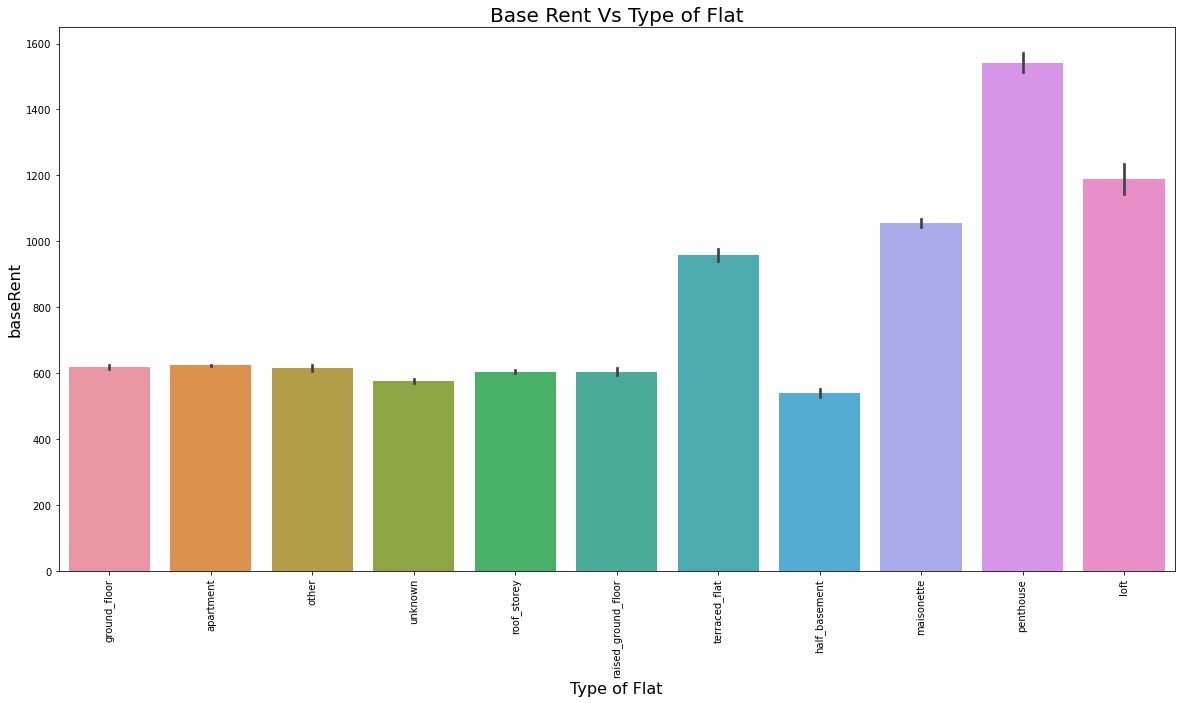

In [47]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'typeOfFlat', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Type of Flat', fontsize = 20)
plt.xlabel('Type of Flat', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [48]:
immo["typeOfFlat"].value_counts(dropna=False).head(11)

apartment              130989
unknown                 36446
roof_storey             34685
ground_floor            31442
other                    9432
maisonette               9304
raised_ground_floor      5619
penthouse                3555
terraced_flat            3381
half_basement            2005
loft                      952
Name: typeOfFlat, dtype: int64

In [49]:
typeOfFlat = immo['typeOfFlat'].unique()
for x in typeOfFlat:
    print(x,":")
    typeOfFlat_1 = immo.loc[immo['typeOfFlat'].str.contains(x, case=False)]
    typeOfFlat_2 = immo.loc[immo['typeOfFlat'].str.contains('penthouse', case=False)]
    mean = round(typeOfFlat_1['baseRent'].mean(),2)
    mean_2 = round(typeOfFlat_2['baseRent'].mean(),2)
    value = round(mean/mean_2,2)
    print(value)

ground_floor :
0.4
apartment :
0.4
other :
0.4
unknown :
0.37
roof_storey :
0.39
raised_ground_floor :
0.39
terraced_flat :
0.62
half_basement :
0.35
maisonette :
0.68
penthouse :
1.0
loft :
0.77


In [50]:
# building price categories based on plot above

In [51]:
immo['typeOfFlat_cat'] = immo['typeOfFlat']
immo.loc[immo['typeOfFlat_cat'] == 'ground_floor', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'apartment', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'other', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'unknown', 'typeOfFlat_cat'] = 0.37
immo.loc[immo['typeOfFlat_cat'] == 'roof_storey', 'typeOfFlat_cat'] = 0.39
immo.loc[immo['typeOfFlat_cat'] == 'raised_ground_floor', 'typeOfFlat_cat'] = 0.39
immo.loc[immo['typeOfFlat_cat'] == 'half_basement', 'typeOfFlat_cat'] = 0.35
immo.loc[immo['typeOfFlat_cat'] == 'terraced_flat', 'typeOfFlat_cat'] = 0.62
immo.loc[immo['typeOfFlat_cat'] == 'maisonette', 'typeOfFlat_cat'] = 0.68
immo.loc[immo['typeOfFlat_cat'] == 'loft', 'typeOfFlat_cat'] = 0.77
immo.loc[immo['typeOfFlat_cat'] == 'penthouse', 'typeOfFlat_cat'] = 1.0

In [52]:
immo["typeOfFlat_cat"].value_counts(dropna=False).head(15)

0.40    171863
0.39     40304
0.37     36446
0.68      9304
1.00      3555
0.62      3381
0.35      2005
0.77       952
Name: typeOfFlat_cat, dtype: int64

### Heating Type

In [53]:
immo["heatingType"].value_counts(dropna=False).head(15)

central_heating                   128430
unknown                            44645
district_heating                   24736
gas_heating                        19905
self_contained_central_heating     19019
floor_heating                      17650
oil_heating                         5031
heat_pump                           2728
combined_heat_and_power_plant       1976
night_storage_heater                1331
wood_pellet_heating                  960
electric_heating                     895
stove_heating                        339
solar_heating                        165
Name: heatingType, dtype: int64

Text(0, 0.5, 'Base Rent')

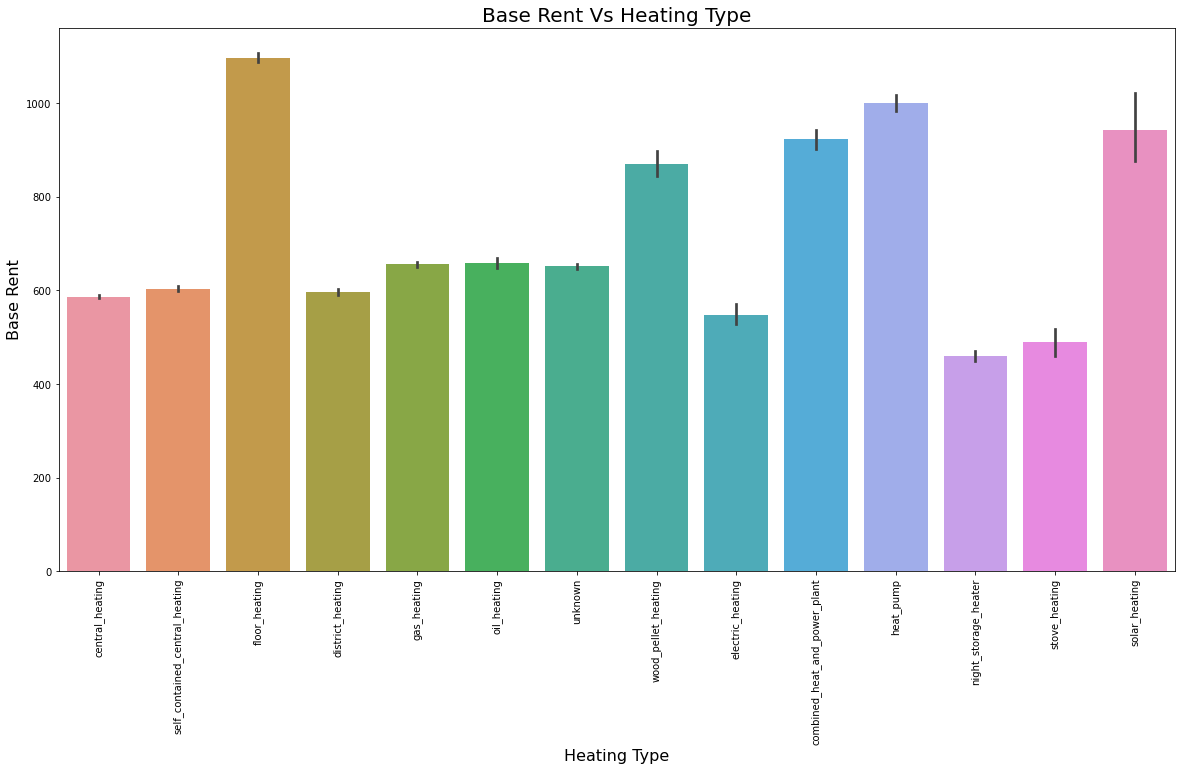

In [54]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'heatingType', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Heating Type', fontsize = 20)
plt.xlabel('Heating Type', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [55]:
heatingType = immo['heatingType'].unique()
for x in heatingType:
    print(x,":")
    heatingType_1 = immo.loc[immo['heatingType'].str.contains(x, case=False)]
    heatingType_2 = immo.loc[immo['heatingType'].str.contains('floor_heating', case=False)]
    mean = round(heatingType_1['baseRent'].mean(),2)
    mean_2 = round(heatingType_2['baseRent'].mean(),2)
    value = round(mean/mean_2,2)
    print(value)

central_heating :
0.54
self_contained_central_heating :
0.55
floor_heating :
1.0
district_heating :
0.54
gas_heating :
0.6
oil_heating :
0.6
unknown :
0.59
wood_pellet_heating :
0.79
electric_heating :
0.5
combined_heat_and_power_plant :
0.84
heat_pump :
0.91
night_storage_heater :
0.42
stove_heating :
0.45
solar_heating :
0.86


In [56]:
# building 3 price categories based on plot above

In [57]:
immo['heatingType_cat'] = immo['heatingType']
immo.loc[immo['heatingType_cat'] == 'central_heating', 'heatingType_cat'] = 0.54
immo.loc[immo['heatingType_cat'] == 'self_contained_central_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'district_heating', 'heatingType_cat'] = 0.54
immo.loc[immo['heatingType_cat'] == 'gas_heating', 'heatingType_cat'] = 0.6
immo.loc[immo['heatingType_cat'] == 'oil_heating', 'heatingType_cat'] = 0.6
immo.loc[immo['heatingType_cat'] == 'unknown', 'heatingType_cat'] = 0.59
immo.loc[immo['heatingType_cat'] == 'electric_heating', 'heatingType_cat'] = 0.50
immo.loc[immo['heatingType_cat'] == 'night_storage_heater', 'heatingType_cat'] = 0.42
immo.loc[immo['heatingType_cat'] == 'stove_heating', 'heatingType_cat'] = 0.45
immo.loc[immo['heatingType_cat'] == 'wood_pellet_heating', 'heatingType_cat'] = 0.79
immo.loc[immo['heatingType_cat'] == 'combined_heat_and_power_plant', 'heatingType_cat'] = 0.84
immo.loc[immo['heatingType_cat'] == 'heat_pump', 'heatingType_cat'] = 0.91
immo.loc[immo['heatingType_cat'] == 'solar_heating', 'heatingType_cat'] = 0.86
immo.loc[immo['heatingType_cat'] == 'floor_heating', 'heatingType_cat'] = 1.00

In [58]:
immo["heatingType_cat"].value_counts(dropna=False).head(15)

0.54    153166
0.59     44645
0.60     24936
0.55     19019
1.00     17650
0.91      2728
0.84      1976
0.42      1331
0.79       960
0.50       895
0.45       339
0.86       165
Name: heatingType_cat, dtype: int64

### firing Types

In [59]:
immo["firingTypes"].value_counts(dropna=False).head(25)

gas                                         127968
unknown                                      56578
district_heating                             50611
oil                                          19163
electricity                                   5286
pellet_heating                                2470
geothermal                                    2451
local_heating                                  929
environmental_thermal_energy                   900
solar                                          529
wood                                           372
combined_heat_and_power_renewable_energy       278
bio_energy                                     146
coal                                            62
hydro_energy                                    52
wind_energy                                     15
Name: firingTypes, dtype: int64

Text(0, 0.5, 'Base Rent')

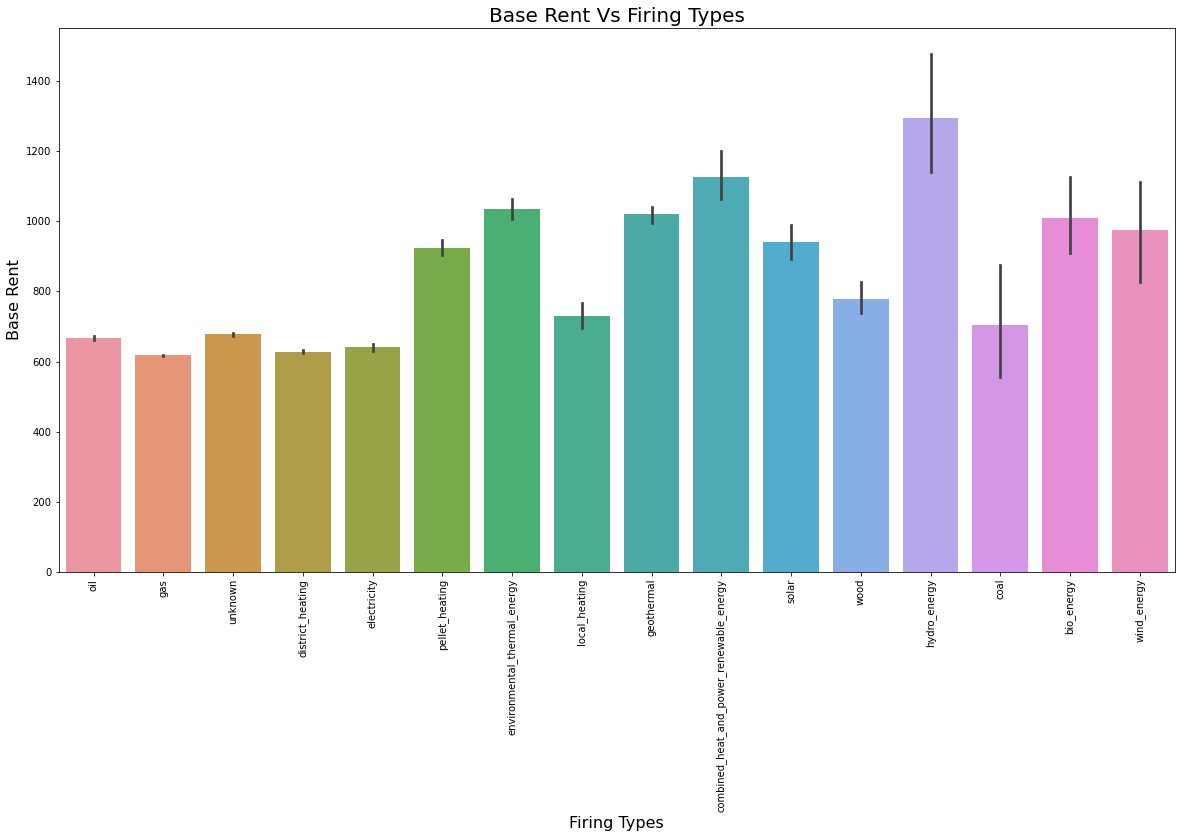

In [60]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'firingTypes', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Firing Types', fontsize = 20)
plt.xlabel('Firing Types', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [61]:
fire = immo['firingTypes'].unique()
for x in fire:
    print(x,":")
    firingTypes_1 = immo.loc[immo['firingTypes'].str.contains(x, case=False)]
    firingTypes_2 = immo.loc[immo['firingTypes'].str.contains('hydro_energy', case=False)]
    mean = round(firingTypes_1['baseRent'].mean(),2)
    mean_2 = round(firingTypes_2['baseRent'].mean(),2)
    value = round(mean/mean_2,2)
    print(value)

oil :
0.52
gas :
0.48
unknown :
0.52
district_heating :
0.48
electricity :
0.49
pellet_heating :
0.71
environmental_thermal_energy :
0.8
local_heating :
0.56
geothermal :
0.79
combined_heat_and_power_renewable_energy :
0.87
solar :
0.73
wood :
0.6
hydro_energy :
1.0
coal :
0.54
bio_energy :
0.78
wind_energy :
0.75


In [62]:
# building price categories based on plot above

In [63]:
immo['firingTypes_cat'] = immo['firingTypes']
immo.loc[immo['firingTypes_cat'] == 'oil', 'firingTypes_cat'] = 0.52
immo.loc[immo['firingTypes_cat'] == 'gas', 'firingTypes_cat'] = 0.48
immo.loc[immo['firingTypes_cat'] == 'unknown', 'firingTypes_cat'] = 0.52
immo.loc[immo['firingTypes_cat'] == 'district_heating', 'firingTypes_cat'] = 0.48
immo.loc[immo['firingTypes_cat'] == 'electricity', 'firingTypes_cat'] = 0.49
immo.loc[immo['firingTypes_cat'] == 'local_heating', 'firingTypes_cat'] = 0.56
immo.loc[immo['firingTypes_cat'] == 'wood', 'firingTypes_cat'] = 0.6
immo.loc[immo['firingTypes_cat'] == 'coal', 'firingTypes_cat'] = 0.54
immo.loc[immo['firingTypes_cat'] == 'pellet_heating', 'firingTypes_cat'] = 0.71
immo.loc[immo['firingTypes_cat'] == 'environmental_thermal_energy', 'firingTypes_cat'] = 0.8
immo.loc[immo['firingTypes_cat'] == 'geothermal', 'firingTypes_cat'] = 0.79
immo.loc[immo['firingTypes_cat'] == 'combined_heat_and_power_renewable_energy', 'firingTypes_cat'] = 0.87
immo.loc[immo['firingTypes_cat'] == 'solar', 'firingTypes_cat'] = 0.73
immo.loc[immo['firingTypes_cat'] == 'bio_energy', 'firingTypes_cat'] = 0.78
immo.loc[immo['firingTypes_cat'] == 'wind_energy', 'firingTypes_cat'] = 0.75
immo.loc[immo['firingTypes_cat'] == 'hydro_energy', 'firingTypes_cat'] = 1.00

In [64]:
immo["firingTypes_cat"].value_counts(dropna=False).head(25)

0.48    178579
0.52     75741
0.49      5286
0.71      2470
0.79      2451
0.56       929
0.80       900
0.73       529
0.60       372
0.87       278
0.78       146
0.54        62
1.00        52
0.75        15
Name: firingTypes_cat, dtype: int64

### condition

Text(0, 0.5, 'baseRent')

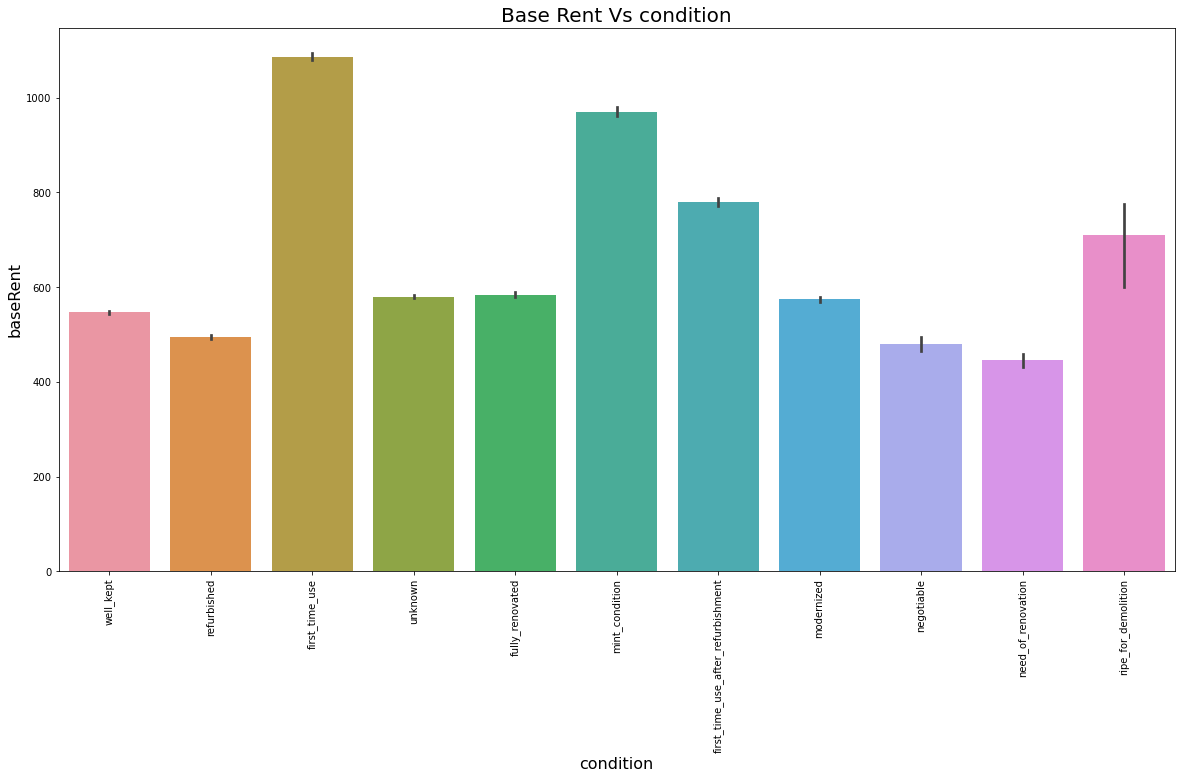

In [65]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'condition', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs condition', fontsize = 20)
plt.xlabel('condition', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [66]:
immo["condition"].value_counts(dropna=False).head(16)

unknown                               68144
well_kept                             66409
refurbished                           26918
fully_renovated                       26302
first_time_use                        21885
mint_condition                        21857
modernized                            17044
first_time_use_after_refurbishment    15655
negotiable                             2234
need_of_renovation                     1359
ripe_for_demolition                       3
Name: condition, dtype: int64

In [67]:
cond = immo['condition'].unique()
for x in cond:
    print(x,":")
    con_1 = immo.loc[immo['condition'].str.contains(x, case=False)]
    con_mint = immo.loc[immo['condition'].str.contains('first_time_use', case=False)]
    mean = round(con_1['baseRent'].mean(),2)
    mean_mint = round(con_mint['baseRent'].mean(),2)
    value = round(mean/mean_mint,2)
    print(value)

well_kept :
0.57
refurbished :
0.52
first_time_use :
1.0
unknown :
0.61
fully_renovated :
0.61
mint_condition :
1.01
first_time_use_after_refurbishment :
0.81
modernized :
0.6
negotiable :
0.5
need_of_renovation :
0.46
ripe_for_demolition :
0.74


In [68]:
# building 11 new categories based on plot above

In [69]:
immo['condition_cat'] = immo['condition']
immo.loc[immo['condition_cat'] == 'well_kept', 'condition_cat'] = 0.57
immo.loc[immo['condition_cat'] == 'refurbished', 'condition_cat'] = 0.52
immo.loc[immo['condition_cat'] == 'first_time_use', 'condition_cat'] = 1.00
immo.loc[immo['condition_cat'] == 'unknown', 'condition_cat'] = 0.61
immo.loc[immo['condition_cat'] == 'fully_renovated', 'condition_cat'] = 0.61
immo.loc[immo['condition_cat'] == 'mint_condition', 'condition_cat'] = 1.00
immo.loc[immo['condition_cat'] == 'first_time_use_after_refurbishment', 'condition_cat'] = 0.81
immo.loc[immo['condition_cat'] == 'modernized', 'condition_cat'] = 0.60
immo.loc[immo['condition_cat'] == 'negotiable', 'condition_cat'] = 0.50
immo.loc[immo['condition_cat'] == 'need_of_renovation', 'condition_cat'] = 0.46
immo.loc[immo['condition_cat'] == 'ripe_for_demolition', 'condition_cat'] = 0.74

### interior Quality

Text(0, 0.5, 'Base Rent')

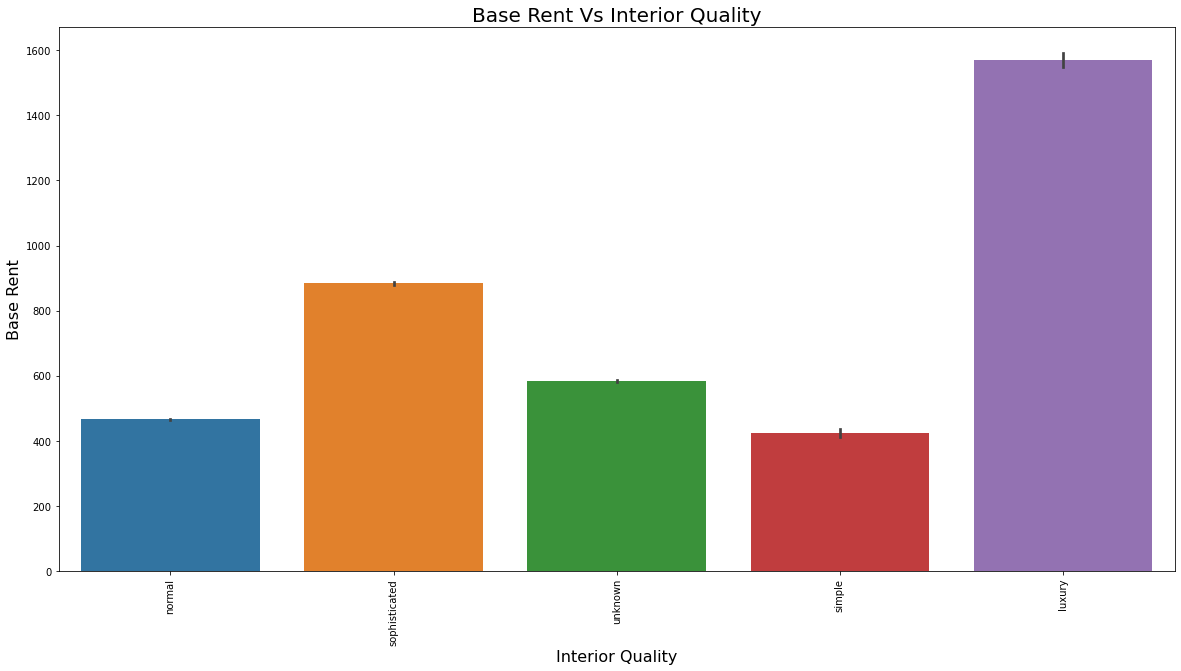

In [70]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'interiorQual', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Interior Quality', fontsize = 20)
plt.xlabel('Interior Quality', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [71]:
int = immo['interiorQual'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['interiorQual'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['interiorQual'].str.contains('luxury', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

normal :
0.3
sophisticated :
0.56
unknown :
0.37
simple :
0.27
luxury :
1.0


In [72]:
# building 5 price categories based on plot above

In [73]:
immo['interiorQual_cat'] = immo['interiorQual']
immo.loc[immo['interiorQual_cat'] == 'normal', 'interiorQual_cat'] = 0.30
immo.loc[immo['interiorQual_cat'] == 'sophisticated', 'interiorQual_cat'] = 0.56
immo.loc[immo['interiorQual_cat'] == 'unknown', 'interiorQual_cat'] = 0.37
immo.loc[immo['interiorQual_cat'] == 'simple', 'interiorQual_cat'] = 0.27
immo.loc[immo['interiorQual_cat'] == 'luxury', 'interiorQual_cat'] = 1.00

In [74]:
immo["interiorQual_cat"].value_counts(dropna=False).head(16)

0.37    112194
0.30     81639
0.56     64428
1.00      7605
0.27      1944
Name: interiorQual_cat, dtype: int64

### Pets allowed

Text(0, 0.5, 'Base Rent')

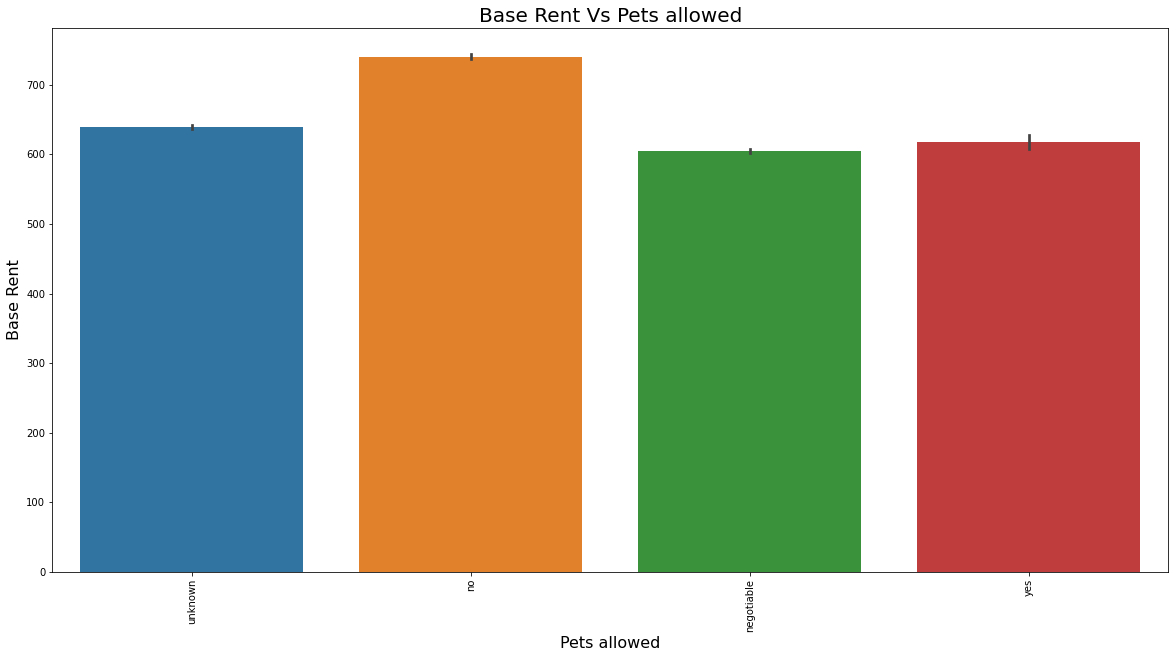

In [75]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'petsAllowed', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Pets allowed', fontsize = 20)
plt.xlabel('Pets allowed', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [76]:
int = immo['petsAllowed'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['petsAllowed'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['petsAllowed'].str.contains('no', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

unknown :
0.95
no :
1.0
negotiable :
0.9
yes :
0.92


In [77]:
# building 4 price categories based on plot above

In [78]:
immo['petsAllowed_cat'] = immo['petsAllowed']
immo.loc[immo['petsAllowed_cat'] == 'unknown', 'petsAllowed_cat'] = 0.95
immo.loc[immo['petsAllowed_cat'] == 'no', 'petsAllowed_cat'] = 1.00
immo.loc[immo['petsAllowed_cat'] == 'negotiable', 'petsAllowed_cat'] = 0.90
immo.loc[immo['petsAllowed_cat'] == 'yes', 'petsAllowed_cat'] = 0.92

In [79]:
immo["petsAllowed_cat"].value_counts(dropna=False).head(16)

0.95    114125
0.90     91730
1.00     51677
0.92     10278
Name: petsAllowed_cat, dtype: int64

### energy Efficiency Class

Text(0, 0.5, 'Base Rent')

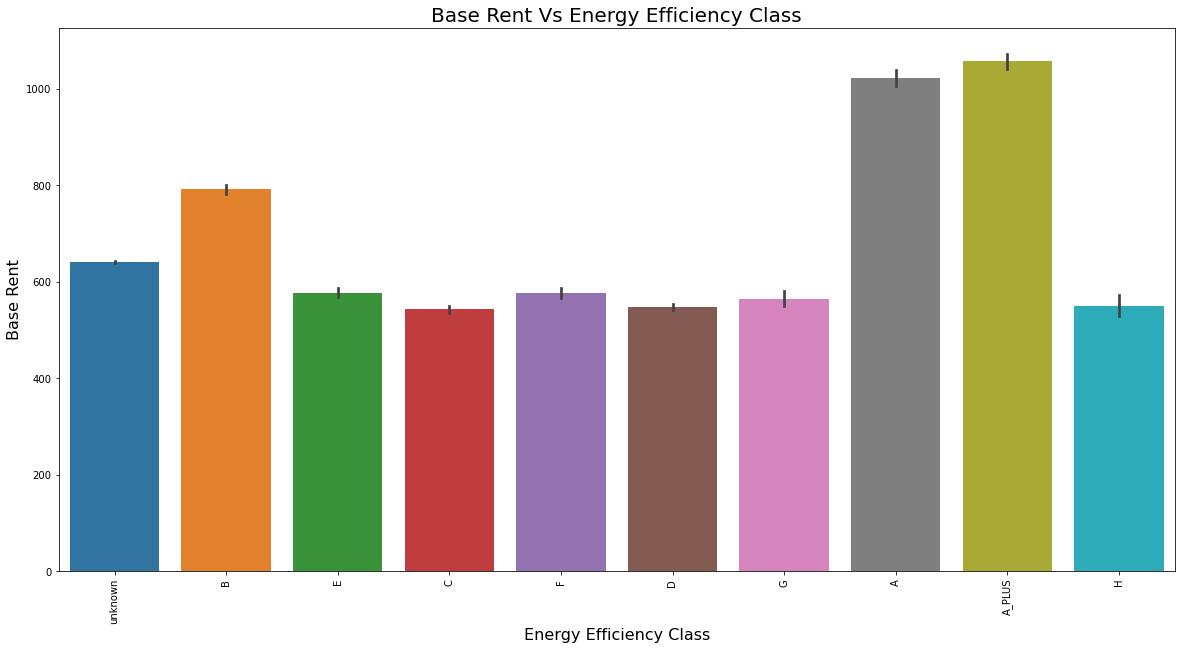

In [80]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'energyEfficiencyClass', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Energy Efficiency Class', fontsize = 20)
plt.xlabel('Energy Efficiency Class', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [81]:
int = immo['energyEfficiencyClass'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['energyEfficiencyClass'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['energyEfficiencyClass'].str.contains('A_PLUS', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

unknown :
0.61
B :
0.75
E :
0.55
C :
0.51
F :
0.54
D :
0.52
G :
0.53
A :
0.98
A_PLUS :
1.0
H :
0.52


In [82]:
# building 10 price categories based on plot above

In [83]:
immo['energyEfficiencyClass_cat'] = immo['energyEfficiencyClass']
immo.loc[immo['energyEfficiencyClass_cat'] == 'unknown', 'energyEfficiencyClass_cat'] = 0.61
immo.loc[immo['energyEfficiencyClass_cat'] == 'B', 'energyEfficiencyClass_cat'] = 0.75
immo.loc[immo['energyEfficiencyClass_cat'] == 'E', 'energyEfficiencyClass_cat'] = 0.55
immo.loc[immo['energyEfficiencyClass_cat'] == 'C', 'energyEfficiencyClass_cat'] = 0.51
immo.loc[immo['energyEfficiencyClass_cat'] == 'F', 'energyEfficiencyClass_cat'] = 0.54
immo.loc[immo['energyEfficiencyClass_cat'] == 'D', 'energyEfficiencyClass_cat'] = 0.52
immo.loc[immo['energyEfficiencyClass_cat'] == 'G', 'energyEfficiencyClass_cat'] = 0.53
immo.loc[immo['energyEfficiencyClass_cat'] == 'A', 'energyEfficiencyClass_cat'] = 0.98
immo.loc[immo['energyEfficiencyClass_cat'] == 'A_PLUS', 'energyEfficiencyClass_cat'] = 1.00
immo.loc[immo['energyEfficiencyClass_cat'] == 'H', 'energyEfficiencyClass_cat'] = 0.52

In [84]:
immo["energyEfficiencyClass_cat"].value_counts(dropna=False).head(16)

0.61    204327
0.52     14767
0.51     14590
0.75     11318
0.55      7955
0.98      4966
0.54      4471
1.00      3616
0.53      1800
Name: energyEfficiencyClass_cat, dtype: int64

In [85]:
immo.to_csv('immo_cat.csv')